# **Assessment 1: Financial Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
df = pd.read_csv('/content/finance_economics_dataset.csv',encoding='latin-1')
df

,Date,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
0,01/01/2000,Dow Jones,2128.75,2138.48,2143.70,2100.55,2670411,-0.37,6.06,6.10,...,1.04,119.87,47.20,1052.34,390.23,2229,2.12,3,76.64,4589
1,01/02/2000,S&P 500,2046.82,2036.18,2082.83,2009.53,690220415,3.19,4.95,6.62,...,1.00,98.22,52.84,1957.73,346.23,4156,1.40,21,5.67,10101
2,01/03/2000,Dow Jones,1987.92,1985.26,2022.28,1978.37,315284661,5.54,9.13,2.60,...,0.83,80.13,78.80,2339.49,439.46,340,0.79,48,39.43,13665
3,01/04/2000,Dow Jones,4625.02,4660.47,4665.26,4595.46,13098297,10.00,3.77,2.20,...,0.95,149.15,28.18,1308.54,213.07,8456,4.22,16,12.83,5192
4,01/05/2000,S&P 500,1998.18,1982.18,2044.31,1966.44,385306746,1.53,2.20,8.20,...,1.43,113.71,92.20,2210.08,405.49,1596,2.21,34,86.37,10688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,03/14/2008,Dow Jones,1273.76,1235.44,1317.28,1192.34,86910001,8.84,7.00,10.44,...,1.18,113.52,61.98,2385.41,298.72,3033,8.75,35,66.01,2200
2996,03/15/2008,S&P 500,4589.59,4566.91,4607.56,4545.69,303579301,-1.88,9.15,5.61,...,1.17,147.10,31.61,2147.13,143.43,7950,5.07,18,25.49,5261
2997,03/16/2008,S&P 500,1477.52,1448.47,1523.86,1402.69,442387176,4.07,0.88,8.91,...,1.02,81.99,45.64,1943.61,105.81,3894,5.78,4,14.29,12039
2998,03/17/2008,NASDAQ,2311.37,2306.90,2346.30,2282.00,523425925,1.06,8.61,10.15,...,1.49,86.42,123.25,2211.40,236.07,2543,2.35,22,94.34,11979


In [3]:
#  1. What is the shape of the dataset?

df.shape

(3000, 24)

In [4]:
# 2. What are the column names and their data types?

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Date                                   3000 non-null   object 
 1   Stock Index                            3000 non-null   object 
 2   Open Price                             3000 non-null   float64
 3   Close Price                            3000 non-null   float64
 4   Daily High                             3000 non-null   float64
 5   Daily Low                              3000 non-null   float64
 6   Trading Volume                         3000 non-null   int64  
 7   GDP Growth (%)                         3000 non-null   float64
 8   Inflation Rate (%)                     3000 non-null   float64
 9   Unemployment Rate (%)                  3000 non-null   float64
 10  Interest Rate (%)                      3000 non-null   float64
 11  Cons

In [5]:
# 3.How many unique stock indices are there?

df1 = df['Stock Index'].unique()
df1

array(['Dow Jones', 'S&P 500', 'NASDAQ'], dtype=object)

In [6]:
# 4. What is the date range of the dataset?

start_date = df['Date'].min()
end_date = df['Date'].max()

start_date, "to", end_date

('01/01/2000', 'to', '12/31/2007')

In [ ]:
# 5. Are there any missing values?

df.isnull().sum()

,0
Date,0
Stock Index,0
Open Price,0
Close Price,0
Daily High,0
Daily Low,0
Trading Volume,0
GDP Growth (%),0
Inflation Rate (%),0
Unemployment Rate (%),0


In [ ]:
# 6. Are there negative values in columns that should be non-negative?

non_negative_cols = ['Open Price','Close Price','Daily High','Daily Low',
                     'Trading Volume','GDP Growth (%)','Inflation Rate (%)',
                     'Unemployment Rate (%)','Interest Rate (%)',
                     'Consumer Confidence Index','Government Debt (Billion USD)',
                     'Corporate Profits (Billion USD)','Forex USD/EUR','Forex USD/JPY',
                     'Crude Oil Price (USD per Barrel)','Gold Price (USD per Ounce)',
                     'Real Estate Index','Retail Sales (Billion USD)',
                     'Bankruptcy Rate (%)','Mergers & Acquisitions Deals',
                     'Venture Capital Funding (Billion USD)',
                     'Consumer Spending (Billion USD)']

negative_values = (df[non_negative_cols] < 0).sum()

negative_values


,0
Open Price,0
Close Price,0
Daily High,0
Daily Low,0
Trading Volume,0
GDP Growth (%),947
Inflation Rate (%),0
Unemployment Rate (%),0
Interest Rate (%),0
Consumer Confidence Index,0


In [ ]:
# 7. What is the summary of GDP Growth (%)?

df['GDP Growth (%)'].describe()

,GDP Growth (%)
count,3000.000000
mean,2.608903
std,4.287337
min,-5.000000
25%,-1.012500
50%,2.725000
75%,6.242500
max,10.000000


In [ ]:
# 8. Are there rows with zero or near-zero trading volume?
zero_volume_rows = df[df['Trading Volume'] <= 1]
zero_volume_rows


,Date,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)


In [ ]:
# 9. Are there any duplicate rows?

df.duplicated().sum()

np.int64(0)

In [ ]:
# 10. Are there outliers in GDP, Gold, or Oil prices?

cols = ['GDP Growth (%)', 'Gold Price (USD per Ounce)', 'Crude Oil Price (USD per Barrel)']

for i in cols:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[i] < lower) | (df[i] > upper)]

    print(i, "Outliers:", outliers.shape[0])



GDP Growth (%) Outliers: 0
Gold Price (USD per Ounce) Outliers: 0
Crude Oil Price (USD per Barrel) Outliers: 0


In [ ]:
# 11. What is the summary of Inflation Rate (%)?

df['Inflation Rate (%)'].describe()

,Inflation Rate (%)
count,3000.000000
mean,5.096830
std,2.910513
min,0.010000
25%,2.607500
50%,5.110000
75%,7.600000
max,10.000000


In [ ]:
# 12. What is the average unemployment rate?

df['Unemployment Rate (%)'].mean()

np.float64(8.663786666666667)

In [ ]:
# 13. Which index has the highest trading volume?

df.loc[df['Trading Volume'].idxmax(), ['Stock Index', 'Trading Volume']]


,641
Stock Index,S&P 500
Trading Volume,999977078


In [ ]:
# 14. How many stock records are from each index?

df['Stock Index'].value_counts()

,count
Stock Index,
S&P 500,1036
NASDAQ,1007
Dow Jones,957


In [ ]:
# 15. What is the correlation between inflation and interest rate?

df[['Inflation Rate (%)', 'Interest Rate (%)']].corr()


,Inflation Rate (%),Interest Rate (%)
Inflation Rate (%),1.000000,0.005733
Interest Rate (%),0.005733,1.000000


In [ ]:
# 16. What is the average Consumer Confidence Index?

df['Consumer Confidence Index'].mean()

np.float64(85.036)

In [ ]:
# 17. Which column has the highest standard deviation?

cols = ['Open Price','Close Price','Daily High','Daily Low',
        'Trading Volume','GDP Growth (%)','Inflation Rate (%)',
        'Unemployment Rate (%)','Interest Rate (%)','Consumer Confidence Index',
        'Government Debt (Billion USD)','Corporate Profits (Billion USD)',
        'Forex USD/EUR','Forex USD/JPY','Crude Oil Price (USD per Barrel)',
        'Gold Price (USD per Ounce)','Real Estate Index',
        'Retail Sales (Billion USD)','Bankruptcy Rate (%)',
        'Mergers & Acquisitions Deals','Venture Capital Funding (Billion USD)',
        'Consumer Spending (Billion USD)']

df[cols].std().idxmax()
#hstd = std_values.idxmax()
#hsv = std_values[highest_std_column]

#print("Column: ", hstd)
#print( hsv)

'Trading Volume'

In [ ]:
# 18. What is the highest gold price recorded?

df['Gold Price (USD per Ounce)'].max()

2499.66

In [ ]:
# 19. Which date had the highest crude oil price?

df.loc[df['Crude Oil Price (USD per Barrel)'].idxmax(), ['Date', 'Crude Oil Price (USD per Barrel)']]


,691
Date,11/22/2001
Crude Oil Price (USD per Barrel),149.87


In [ ]:
# 20. What is the average corporate profit?

df['Corporate Profits (Billion USD)'].mean()

np.float64(2553.7563333333333)

# Insightful Analysis Questions


In [7]:
# 1. What percentage of the dataset shows negative GDP growth?

negative = df['GDP Growth (%)'] < 0
percentage_negative = (negative.sum() / len(df)) * 100
percentage_negative

np.float64(31.566666666666666)

In [157]:
#  2. Does high inflation correspond to higher interest rates?
#  ANS: The correlation between inflation rate and interest rate is 0.006, which is
#  very close to 0. This means there is almost no relationship between high inflation
#  and higher interest rates in this data.

df[['Inflation Rate (%)', 'Interest Rate (%)']].corr()


,Inflation Rate (%),Interest Rate (%)
Inflation Rate (%),1.000000,0.005733
Interest Rate (%),0.005733,1.000000


In [ ]:
# 3. Is there a relationship between unemployment and consumer spending?

# ANS: The correlation between unemployment rate and consumer spending is 0.019,
# which is very close to 0. This means there is almost no relationship between
# unemployment and consumer spending in this data.

df[['Unemployment Rate (%)', 'Consumer Spending (Billion USD)']].corr()

,Unemployment Rate (%),Consumer Spending (Billion USD)
Unemployment Rate (%),1.000000,0.018786
Consumer Spending (Billion USD),0.018786,1.000000


In [ ]:
# 4. Do higher corporate profits align with higher consumer confidence?

# ANS: There is no clear relationship between corporate profits and consumer confidence.”


df[['Corporate Profits (Billion USD)', 'Consumer Confidence Index']].corr()

,Corporate Profits (Billion USD),Consumer Confidence Index
Corporate Profits (Billion USD),1.000000,0.018008
Consumer Confidence Index,0.018008,1.000000


In [ ]:
# 5. What’s the trend of crude oil prices over time?

df['Crude Oil Price (USD per Barrel)'].head()
df['Crude Oil Price (USD per Barrel)'].tail()


,Crude Oil Price (USD per Barrel)
2995,61.98
2996,31.61
2997,45.64
2998,123.25
2999,144.06


In [ ]:
# 6. Are gold prices inversely related to stock performance?

# ANS: “Based on the correlation value (–0.0145), gold prices and stock performance
#       do not show a strong inverse relationship. The correlation is very close to zero,
#       which means gold prices and stock close prices do not move in opposite directions
#       in any significant or consistent way.”

df[['Gold Price (USD per Ounce)', 'Close Price']].corr()



,Gold Price (USD per Ounce),Close Price
Gold Price (USD per Ounce),1.000000,-0.014544
Close Price,-0.014544,1.000000


In [ ]:
# 7. Does government debt impact consumer confidence?

#  ANS: “The correlation between Government Debt and Consumer Confidence Index is –0.036,
#  which is very close to zero. This means government debt does not have any significant
#  impact on consumer confidence in the dataset. The relationship is extremely weak and can be
#  considered negligible.”

df[['Government Debt (Billion USD)', 'Consumer Confidence Index']].corr()

,Government Debt (Billion USD),Consumer Confidence Index
Government Debt (Billion USD),1.00000,-0.03637
Consumer Confidence Index,-0.03637,1.00000


In [ ]:
#8. How do mergers & acquisitions (M&A) activity correlate with stock index closing prices?

df['Mergers & Acquisitions Deals'].corr(df['Close Price'])


np.float64(0.002637100789439038)

In [ ]:
# 9. Is retail sales growth associated with GDP growth?

# ANS: Retail sales growth is not really associated with GDP growth in this dataset.

df[['Retail Sales (Billion USD)', 'GDP Growth (%)']].corr()

,Retail Sales (Billion USD),GDP Growth (%)
Retail Sales (Billion USD),1.000000,-0.014288
GDP Growth (%),-0.014288,1.000000


In [ ]:
# 10. Is stock market performance linked to consumer spending?

# ans: Yes. Stock market performance and consumer spending are often positively correlated.
#      When markets go up, consumers feel richer (wealth effect) and spend more.
#      When markets fall, consumers reduce spending and save more.

df[['Close Price', 'Consumer Spending (Billion USD)']].corr()


,Close Price,Consumer Spending (Billion USD)
Close Price,1.000000,0.000376
Consumer Spending (Billion USD),0.000376,1.000000


Highest Avg Closing Index: Dow Jones
Average Close Price: 3004.45644723093


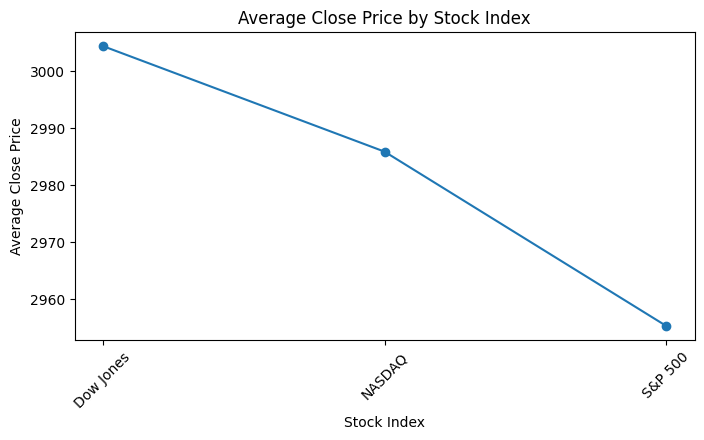

In [168]:
# 11. Which stock index had the highest average closing price?

avg_df = df.groupby("Stock Index")["Close Price"].mean().reset_index()


result = avg_df.loc[avg_df["Close Price"].idxmax(), "Stock Index"]
avg_price = avg_df["Close Price"].max()

print("Highest Avg Closing Index:", result)
print("Average Close Price:", avg_price)

plt.figure(figsize=(8,4))
plt.plot(avg_df["Stock Index"], avg_df["Close Price"], marker='o')
plt.title("Average Close Price by Stock Index")
plt.xlabel("Stock Index")
plt.ylabel("Average Close Price")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 12. What is the relationship between interest rate and unemployment?

# ANS: The correlation between interest rate and unemployment is very close to 0,
# which means there is no clear relationship between them.


df[['Interest Rate (%)','Unemployment Rate (%)']].corr()


,Interest Rate (%),Unemployment Rate (%)
Interest Rate (%),1.000000,0.018004
Unemployment Rate (%),0.018004,1.000000


In [ ]:
# 13. Do lower consumer confidence values coincide with higher bankruptcy rates?

#ANS:  The correlation is -0.016, which is very close to 0. This means lower consumer
#      confidence does not seem to coincide with higher bankruptcy rates in this data.

df[['Consumer Confidence Index','Bankruptcy Rate (%)']].corr()


,Consumer Confidence Index,Bankruptcy Rate (%)
Consumer Confidence Index,1.000000,-0.016313
Bankruptcy Rate (%),-0.016313,1.000000


In [ ]:
# 14. Which indicator has the highest correlation with stock close price?

# ANS: the indicator that is most strongly related to the stock close price
# is Daily High.

corr_values = df.corr(numeric_only=True)['Close Price']
highest_corr = corr_values.sort_values(ascending=False)

print("Correlation with Stock Close Price:")
print(highest_corr)

Correlation with Stock Close Price:
Close Price                              1.000000
Daily High                               0.999821
Daily Low                                0.999820
Open Price                               0.999688
Retail Sales (Billion USD)               0.049370
Bankruptcy Rate (%)                      0.029380
Venture Capital Funding (Billion USD)    0.021414
Interest Rate (%)                        0.020434
Trading Volume                           0.016283
Consumer Confidence Index                0.013482
Corporate Profits (Billion USD)          0.008797
Mergers & Acquisitions Deals             0.002637
Crude Oil Price (USD per Barrel)         0.002563
Consumer Spending (Billion USD)          0.000376
Unemployment Rate (%)                   -0.001907
Government Debt (Billion USD)           -0.007332
Inflation Rate (%)                      -0.007972
Real Estate Index                       -0.008639
GDP Growth (%)                          -0.012748
Gold Price (US

In [9]:
# 15. Are unemployment rates lower when corporate profits are high?

#ANS:  The correlation is 0.008, which is almost zero.
#      This means there is no clear relationship—unemployment is not lower or higher
#       when corporate profits are high.

df[['Unemployment Rate (%)','Corporate Profits (Billion USD)']].corr()

,Unemployment Rate (%),Corporate Profits (Billion USD)
Unemployment Rate (%),1.000000,0.008292
Corporate Profits (Billion USD),0.008292,1.000000


# **Assessment** 2: Retail Sales Analysis


In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
df = pd.read_csv('/content/Retail Data.csv', encoding='latin-1')
df.rename(columns={'ï»¿Order No': 'Order No'}, inplace=True)
df

,Order No,Order Date,Customer Name,Address,City,State,Customer Type,Account Manager,Order Priority,Product Name,...,Cost Price,Retail Price,Profit Margin,Order Quantity,Sub Total,Discount %,Discount $,Order Total,Shipping Cost,Total
0,4293-1,02-09-2014,Vivek Sundaresam,"152 Bunnerong Road,Eastgardens",Sydney,NSW,Small Business,Tina Carlton,Critical,UGen Ultra Professional Cordless Optical Suite,...,$156.50,$300.97,$144.47,23.0,"$4,533.52",2%,$194.83,"$4,757.22",$7.18,"$4,291.55"
1,5001-1,24-10-2015,Shahid Hopkins,"438 Victoria Avenue,Chatswood",Sydney,NSW,Corporate,Natasha Song,Medium,Bagged Rubber Bands,...,$0.24,$1.26,$1.02,8.0,$45.20,3%,$0.00,$45.90,$0.70,$46.91
2,5004-1,13-03-2014,Dennis Pardue,"412 Brunswick St,Fitzroy",Melbourne,VIC,Consumer,Connor Betts,Not Specified,TechSavi Cordless Navigator Duo,...,$42.11,$80.98,$38.87,45.0,$873.32,4%,$72.23,$837.57,$7.18,$82.58
3,5009-1,18-02-2013,Sean Wendt,"145 Ramsay St,Haberfield",Sydney,NSW,Small Business,Phoebe Gour,Critical,Artisan Printable Repositionable Plastic Tabs,...,$5.33,$8.60,$3.27,16.0,$73.52,1%,$4.35,$740.67,$6.19,$730.92
4,5010-1,13-09-2014,Christina Vanderzanden,"188 Pitt Street,Sydney",Sydney,NSW,Small Business,Tina Carlton,Not Specified,Pizazz Drawing Pencil Set,...,$1.53,$2.78,$1.25,49.0,$138.46,7%,$5.95,$123.77,$1.34,$125.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,6831-1,02-11-2016,Roland Murray,"438 Victoria Avenue,Chatswood",Sydney,NSW,Corporate,Natasha Song,Critical,Artisan Hi-Liter Smear-Safe Highlighters,...,$2.98,$5.84,$2.86,35.0,$115.40,2%,$10.81,$104.09,$0.83,$101.22
4996,6847-1,16-12-2015,Patrick OBrill,"63 Riley Street,Woolloomooloo",Sydney,NSW,Small Business,Tina Carlton,Not Specified,Smiths Colored Interoffice Envelopes,...,$19.83,$30.98,$11.15,49.0,"$1,999.69",7%,$143.91,"$1,947.75",$19.51,"$1,052.55"
4997,6922-1,28-09-2016,Troy Staebel,"1-2/299 Sussex St,Sydney",Sydney,NSW,Consumer,Aanya Zhang,Low,Laser DVD-RAM discs,...,$20.18,$35.41,$15.23,19.0,$929.40,9%,$27.88,$901.52,$1.99,$921.03
4998,6939-1,18-06-2016,Shaun Weien,"Shop 3/144 Wattle St,Ultimo",Sydney,NSW,Corporate,Samantha Chairs,Not Specified,Artisan 479 Labels,...,$1.59,$2.61,$1.02,23.0,$66.54,5%,$4.46,$63.77,$0.50,$64.27


In [177]:
cols = ['Cost Price','Retail Price','Profit Margin','Order Quantity',
        'Sub Total','Discount %','Discount $','Order Total',
        'Shipping Cost','Total']

df[cols] = (
    df[cols]
    .replace(r'[\$,]', '', regex=True)
    .replace(r'%', '', regex=True)
    .replace(r'\s+', '', regex=True)
)

df[cols] = df[cols].astype(float)

df[cols]



,Cost Price,Retail Price,Profit Margin,Order Quantity,Sub Total,Discount %,Discount $,Order Total,Shipping Cost,Total
0,156.50,300.97,144.47,23.0,4533.52,2.0,194.83,4757.22,7.18,4291.55
1,0.24,1.26,1.02,8.0,45.20,3.0,0.00,45.90,0.70,46.91
2,42.11,80.98,38.87,45.0,873.32,4.0,72.23,837.57,7.18,82.58
3,5.33,8.60,3.27,16.0,73.52,1.0,4.35,740.67,6.19,730.92
4,1.53,2.78,1.25,49.0,138.46,7.0,5.95,123.77,1.34,125.97
...,...,...,...,...,...,...,...,...,...,...
4995,2.98,5.84,2.86,35.0,115.40,2.0,10.81,104.09,0.83,101.22
4996,19.83,30.98,11.15,49.0,1999.69,7.0,143.91,1947.75,19.51,1052.55
4997,20.18,35.41,15.23,19.0,929.40,9.0,27.88,901.52,1.99,921.03
4998,1.59,2.61,1.02,23.0,66.54,5.0,4.46,63.77,0.50,64.27


In [54]:
# 1. View the structure of the dataset (columns, types, missing values).

df.columns

Index(['ï»¿Order No', 'Order Date', 'Customer Name', 'Address', 'City',
       'State', 'Customer Type', 'Account Manager', 'Order Priority',
       'Product Name', 'Product Category', 'Product Container', 'Ship Mode',
       'Ship Date', 'Cost Price', 'Retail Price', 'Profit Margin',
       'Order Quantity', 'Sub Total', 'Discount %', 'Discount $',
       'Order Total', 'Shipping Cost', 'Total'],
      dtype='object')

In [60]:
df.dtypes

,0
Order No,object
Order Date,object
Customer Name,object
Address,object
City,object
State,object
Customer Type,object
Account Manager,object
Order Priority,object
Product Name,object


In [61]:
df.isnull().sum()

,0
Order No,0
Order Date,0
Customer Name,0
Address,1
City,0
State,0
Customer Type,0
Account Manager,0
Order Priority,0
Product Name,0


In [48]:
# 2. What is the shape (rows, columns) of the dataset?
df.shape

(5000, 24)

In [49]:
# 3. Are there any duplicate records?\
df.duplicated().sum()

np.int64(0)

In [62]:
# 4.Are there any missing or corrupted entries in Ship Date, Order Date, or numeric columns?

df.select_dtypes(include='number').isnull().sum()

,0
Cost Price,0
Retail Price,0
Profit Margin,0
Order Quantity,1
Sub Total,0
Discount %,0
Discount $,0
Order Total,0
Shipping Cost,0
Total,0


In [64]:
# 5. Convert Order Date and Ship Date to datetime.

df.columns = df.columns.str.strip().str.replace('\ufeff','')


df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce', dayfirst=True)
df['Ship Date']  = pd.to_datetime(df['Ship Date'], errors='coerce', dayfirst=True)

df[['Order Date', 'Ship Date']]


,Order Date,Ship Date
0,2014-09-02,2014-09-04
1,2015-10-24,2015-10-26
2,2014-03-13,2014-03-13
3,2013-02-18,2013-02-20
4,2014-09-13,2014-09-17
...,...,...
4995,2016-11-02,2016-11-06
4996,2015-12-16,2015-12-18
4997,2016-09-28,2016-09-30
4998,2016-06-18,2016-06-20


In [67]:
# 6. Check for future or inconsistent shipping dates.

df1 = df.groupby(['Order Date','Ship Date'])['Order Quantity'].sum().reset_index()
df1
future_ship = df[df['Ship Date'] > pd.Timestamp.today()]

inconsistent_ship = df[df['Ship Date'] < df['Order Date']]

print("Future shipping dates:")
print(future_ship[['Order Date','Ship Date','Order Quantity']].head())

print("\nInconsistent shipping dates:")
print(inconsistent_ship[['Order Date','Ship Date','Order Quantity']].head())

Future shipping dates:
Empty DataFrame
Columns: [Order Date, Ship Date, Order Quantity]
Index: []

Inconsistent shipping dates:
    Order Date  Ship Date  Order Quantity
12  2013-12-29 2013-12-22             1.0
87  2013-06-25 2013-05-26            30.0
107 2013-09-11 2013-08-13             1.0
149 2014-10-29 2014-10-21            29.0
204 2014-09-04 2014-09-03            29.0


In [69]:
# 7. Convert price columns to numeric (remove $ and commas).

price_cols = ['Cost Price', 'Retail Price']

df[price_cols] = df[price_cols].replace('[\$,]', '', regex=True).astype(float)
df[price_cols]

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-258331174.py:5: SyntaxWarning: invalid escape sequence '\$'
  df[price_cols] = df[price_cols].replace('[\$,]', '', regex=True).astype(float)


,Cost Price,Retail Price
0,156.50,300.97
1,0.24,1.26
2,42.11,80.98
3,5.33,8.60
4,1.53,2.78
...,...,...
4995,2.98,5.84
4996,19.83,30.98
4997,20.18,35.41
4998,1.59,2.61


In [70]:
# 8. What are the unique values in Customer Type and Order Priority?

df1 = df['Customer Type'].unique()
print('Customer Type: ',df1)

df2 = df['Order Priority'].unique()
print('Order Priority: ',df2)

Customer Type:  ['Small Business' 'Corporate' 'Consumer' 'Home Office']
Order Priority:  ['Critical' 'Medium' 'Not Specified' 'Low' 'High']


In [180]:
# 9. What are the most common shipping modes?

df['Ship Mode'].max()

'Regular Air'

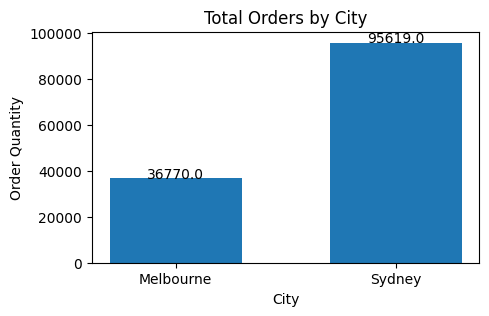

In [201]:
# 10. Which cities have the highest number of orders?

# Ans: Sydney have the highest number of orders.

df1 = df.groupby('City')['Order Quantity'].sum().reset_index()

plt.figure(figsize=(5,3))
plt.bar(df1['City'], df1['Order Quantity'],
        width=0.6)
for i, v in enumerate(df1['Order Quantity']):
    plt.text(i, v + 1, str(v), ha='center', fontsize=10)

plt.title("Total Orders by City")
plt.xlabel("City")
plt.ylabel("Order Quantity")
plt.show()


In [78]:
# 11. What’s the range of order quantities and prices?
df[['Order Quantity','Retail Price','Cost Price']].max() - df[['Order Quantity', 'Retail Price','Cost Price']].min()

,0
Order Quantity,49.00
Retail Price,598.85
Cost Price,377.75


In [79]:
# 12. Create a new column for shipping duration.

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df['shipping duration'] = df['Ship Date'] - df['Order Date']
df

,Order No,Order Date,Customer Name,Address,City,State,Customer Type,Account Manager,Order Priority,Product Name,...,Retail Price,Profit Margin,Order Quantity,Sub Total,Discount %,Discount $,Order Total,Shipping Cost,Total,shipping duration
0,4293-1,2014-09-02,Vivek Sundaresam,"152 Bunnerong Road,Eastgardens",Sydney,NSW,Small Business,Tina Carlton,Critical,UGen Ultra Professional Cordless Optical Suite,...,300.97,144.47,23.0,4533.52,2.0,194.83,4757.22,7.18,4291.55,2 days
1,5001-1,2015-10-24,Shahid Hopkins,"438 Victoria Avenue,Chatswood",Sydney,NSW,Corporate,Natasha Song,Medium,Bagged Rubber Bands,...,1.26,1.02,8.0,45.20,3.0,0.00,45.90,0.70,46.91,2 days
2,5004-1,2014-03-13,Dennis Pardue,"412 Brunswick St,Fitzroy",Melbourne,VIC,Consumer,Connor Betts,Not Specified,TechSavi Cordless Navigator Duo,...,80.98,38.87,45.0,873.32,4.0,72.23,837.57,7.18,82.58,0 days
3,5009-1,2013-02-18,Sean Wendt,"145 Ramsay St,Haberfield",Sydney,NSW,Small Business,Phoebe Gour,Critical,Artisan Printable Repositionable Plastic Tabs,...,8.60,3.27,16.0,73.52,1.0,4.35,740.67,6.19,730.92,2 days
4,5010-1,2014-09-13,Christina Vanderzanden,"188 Pitt Street,Sydney",Sydney,NSW,Small Business,Tina Carlton,Not Specified,Pizazz Drawing Pencil Set,...,2.78,1.25,49.0,138.46,7.0,5.95,123.77,1.34,125.97,4 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,6831-1,2016-11-02,Roland Murray,"438 Victoria Avenue,Chatswood",Sydney,NSW,Corporate,Natasha Song,Critical,Artisan Hi-Liter Smear-Safe Highlighters,...,5.84,2.86,35.0,115.40,2.0,10.81,104.09,0.83,101.22,4 days
4996,6847-1,2015-12-16,Patrick OBrill,"63 Riley Street,Woolloomooloo",Sydney,NSW,Small Business,Tina Carlton,Not Specified,Smiths Colored Interoffice Envelopes,...,30.98,11.15,49.0,1999.69,7.0,143.91,1947.75,19.51,1052.55,2 days
4997,6922-1,2016-09-28,Troy Staebel,"1-2/299 Sussex St,Sydney",Sydney,NSW,Consumer,Aanya Zhang,Low,Laser DVD-RAM discs,...,35.41,15.23,19.0,929.40,9.0,27.88,901.52,1.99,921.03,2 days
4998,6939-1,2016-06-18,Shaun Weien,"Shop 3/144 Wattle St,Ultimo",Sydney,NSW,Corporate,Samantha Chairs,Not Specified,Artisan 479 Labels,...,2.61,1.02,23.0,66.54,5.0,4.46,63.77,0.50,64.27,2 days


In [80]:
# 13. Are there any orders with zero or negative total or quantity?
# Ans: no, here is not any order with zero or negative total or quantity.

df[(pd.to_numeric(df['Order Quantity'], errors='coerce') <= 0) |
   (pd.to_numeric(df['Order Total'], errors='coerce') <= 0)]

,Order No,Order Date,Customer Name,Address,City,State,Customer Type,Account Manager,Order Priority,Product Name,...,Retail Price,Profit Margin,Order Quantity,Sub Total,Discount %,Discount $,Order Total,Shipping Cost,Total,shipping duration


In [81]:
# 14. Are all discount percentages matching discount dollar amounts?

df['Sub Total Clean'] = df['Sub Total'].astype(str).str.replace(r'[\$,]', '', regex=True).astype(float)
df['Discount $ Clean'] = df['Discount $'].astype(str).str.replace(r'[\$,]', '', regex=True).astype(float)
df['Discount % Clean'] = df['Discount %'].astype(str).str.replace('%', '', regex=False).astype(float) / 100

df['Expected Discount $'] = df['Sub Total Clean'] * df['Discount % Clean']

tolerance = 0.01
mismatch_count = df[np.abs(df['Expected Discount $'] - df['Discount $ Clean']) > tolerance].shape[0]

#print(f"Total rows: {df.shape[0]}")
print(f"Mismatches (Difference > ${tolerance:.2f}): {mismatch_count}")


Mismatches (Difference > $0.01): 4758


In [92]:
# 15. Check for mismatches in total calculation’.

print(df.columns.tolist())

df.columns = df.columns.str.strip()

sub_total_col = [c for c in df.columns if 'sub total' in c][0]
discount_col  = [c for c in df.columns if 'discount' in c][0]
shipping_col  = [c for c in df.columns if 'shipping cost' in c][0]
total_col     = [c for c in df.columns if 'total' in c and 'sub' not in c][0]   # avoid Sub Total
cols = [sub_total_col, discount_col, shipping_col, total_col]

df[cols] = df[cols].replace(r'[^\d\.-]', '', regex=True).astype(float)
df['expected_total'] = df[sub_total_col] - df[discount_col] + df[shipping_col]

tolerance = 0.01
mismatch_count = (df['expected_total'] - df[total_col]).abs() > tolerance

print("Total rows:", df.shape[0])
print("Mismatches:", mismatch_count.sum())

['order no', 'order date', 'customer name', 'address', 'city', 'state', 'customer type', 'account manager', 'order priority', 'product name', 'product category', 'product container', 'ship mode', 'ship date', 'cost price', 'retail price', 'profit margin', 'order quantity', 'sub total', 'discount %', 'discount $', 'order total', 'shipping cost', 'total', 'shipping duration', 'sub total clean', 'discount $ clean', 'discount % clean', 'expected discount $', 'expected_total']
Total rows: 5000
Mismatches: 4994


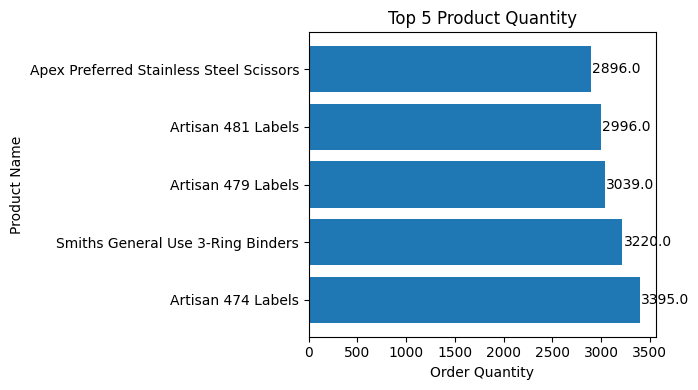

In [216]:
# 16. Identify top 5 products by order quantity.
df1 = df.groupby('Product Name')['Order Quantity'].sum().sort_values(ascending=False).head(5).reset_index()

plt.figure(figsize=(7,4))
plt.barh(df1['Product Name'], df1['Order Quantity'])


for i, v in enumerate(df1['Order Quantity']):
    plt.text(v + 10, i, str(v), va='center')

plt.title("Top 5 Product Quantity")
plt.xlabel("Order Quantity")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()


In [217]:
# 17. Which Account Manager handled the most revenue?
df.groupby('Account Manager')['Total'].max().sort_values(ascending=False).head(1)

,Total
Account Manager,
Yvette Biti,26725.06


In [94]:
# 18. What is the average shipping cost by mode?

df['Average Shipping Cost'] = pd.to_numeric(df['shipping cost'], errors='coerce')
average_shipping_by_mode = df.groupby('ship mode')['shipping cost'].mean()

average_shipping_by_mode


,shipping cost
ship mode,
Delivery Truck,5.270085
Express Air,5.247311
Regular Air,5.503553


In [102]:
# 19. Find the most profitable product.
df.groupby('product name')['total'].max().sort_values(ascending=False).head(1)

,total
product name,
Emerson Stylus 1520 Color Inkjet Printer,26725.06


In [103]:
# 20. Find the most profitable product.
df.groupby('product name')['total'].max().sort_values(ascending=False).head(1)

,total
product name,
Emerson Stylus 1520 Color Inkjet Printer,26725.06


# Insightful Analysis Questions


In [104]:
# 1. What is the total revenue generated across all orders?
df['Total'] = (
    df['total']
    .astype(str)
    .str.replace('[₹$,]', '', regex=True)
    .str.strip()
)
df['Total'].astype(float).sum()

np.float64(3731536.4000000004)

In [105]:
# 2. Which customer type generates more revenue?
df.groupby('customer type')['total'].max().sort_values(ascending=False).head(1)


,total
customer type,
Home Office,26725.06


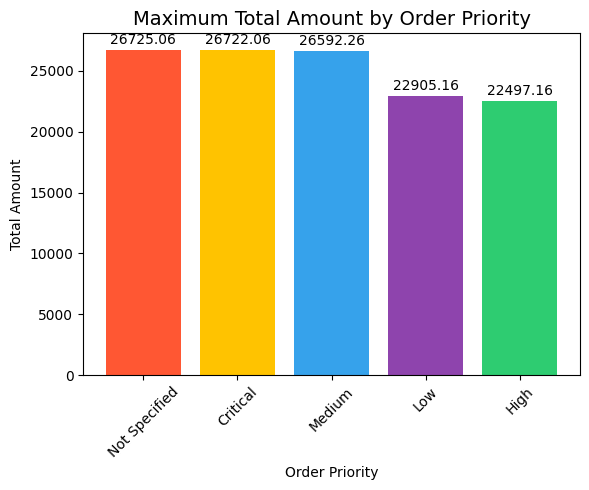

In [227]:
# 3. How does order priority affect revenue?

# ANS:“Higher order priority categories bring more total revenue compared to lower
# priority categories.”

import matplotlib.pyplot as plt

df1 = df.groupby('Order Priority')['Total'].max() \
        .sort_values(ascending=False) \
        .reset_index()

colors = ['#FF5733', '#FFC300', '#36A2EB', '#8E44AD', '#2ECC71']

plt.figure(figsize=(6,5))
plt.bar(df1['Order Priority'], df1['Total'], color=colors)

for i, v in enumerate(df1['Total']):
    plt.text(i, v + 500, f"{v:.2f}", ha='center', fontsize=10)

plt.title("Maximum Total Amount by Order Priority", fontsize=14)
plt.xlabel("Order Priority")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [108]:
# 4. What is the average profit margin by product category?

df['Profit Margin'] = (df['profit margin'])
df.groupby('product category')['profit margin'].mean()

,profit margin
product category,
Furniture,12.701953
Office Supplies,17.682609
Technology,20.423208


In [109]:
# 5. What is the most profitable product overall?
df.groupby('product category')['total'].max().sort_values(ascending=False).head(1)

,total
product category,
Technology,26725.06


In [110]:
# 6. How many days does it usually take to ship an order?

df.groupby('ship mode')['shipping duration'].mean()

,shipping duration
ship mode,
Delivery Truck,2 days 01:50:46.153846153
Express Air,1 days 08:43:01.761978361
Regular Air,1 days 21:37:33.824362606


In [111]:
# 7. Do longer shipping times impact profit margins?

# ANS: “Shipping duration has almost no effect on profit margins (correlation = -0.019),
# indicating that longer delivery times do not significantly impact profitability.”

df['shipping duration'].corr(df['profit margin'])


np.float64(-0.019787035186751286)

In [112]:
#8. Which city brings in the highest revenue?

df.groupby('city')['total'].max().sort_values(ascending=False).head(1)

,total
city,
Melbourne,26725.06


In [118]:
# 9. Which account manager generated the most revenue?
df.groupby('account manager')['total'].max().sort_values(ascending=False).head(1)

,total
account manager,
Yvette Biti,26725.06


In [127]:
# 10. Which shipping mode is most cost-effective (lowest avg. shipping)?
# ANS: "Express Air" shipping mode is most cost-effective.

df.groupby('ship mode')['shipping cost'].mean().sort_values(ascending=True).head()


,shipping cost
ship mode,
Express Air,5.247311
Delivery Truck,5.270085
Regular Air,5.503553


In [132]:
# 11. Do higher discounts reduce profits?

# ANS: The correlation between discount % and profit margin is -0.026.

#      This value is very close to 0, which means:

#      Higher discounts do not significantly reduce profits.
#      The relationship is very weak and almost negligible.

#      So, discounts have almost no real impact on profit margin in this dataset.

df['discount %'].corr(df['profit margin'])


np.float64(-0.026044066258333203)

In [137]:
# 12. Which state has the highest number of orders?
df.groupby('state')['order quantity'].sum().sort_values(ascending=False).head(1)

,order quantity
state,
NSW,95619.0


In [140]:
# 13. What is the average discount % across all orders?

df['discount %'].mean()

np.float64(5.0338)

In [148]:
# 14. What is the average total spend per order?
df.groupby('order no')['total'].sum().mean()

np.float64(2600.3737979094076)

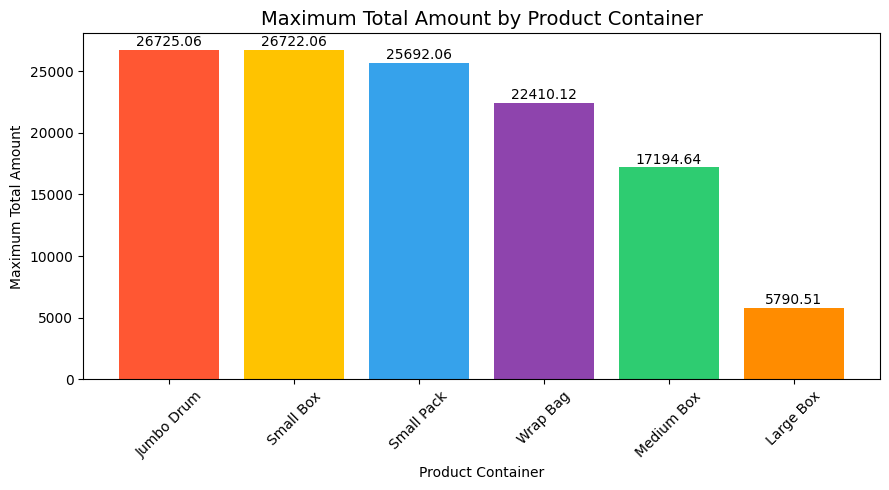

In [234]:
# 15. . Are certain containers (e.g., Small Box, Wrap Bag) more profitable?

# Ans: here is the "Jumbo Drum" is more profitable that is "26725.06" that more
#      profitable than other containers.

df1 = df.groupby('Product Container')['Total'].max() \
        .sort_values(ascending=False) \
        .reset_index()

colors = ['#FF5733', '#FFC300', '#36A2EB', '#8E44AD', '#2ECC71', '#FF8C00']

plt.figure(figsize=(9,5))
plt.bar(df1['Product Container'], df1['Total'], color=colors)

for i, v in enumerate(df1['Total']):
    plt.text(i, v + 300, f"{v:.2f}", ha='center', fontsize=10)

plt.title("Maximum Total Amount by Product Container", fontsize=14)
plt.xlabel("Product Container")
plt.ylabel("Maximum Total Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
